# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns


### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:

filepath = '/content/drive/MyDrive/foodhub_order.csv'

# Reads the CSV file into a pandas DataFrame and stores it in the 'foodhub' variable
foodhub = pd.read_csv(filepath)

# Creates a copy of the 'foodhub' DataFrame and stores it in the 'fh' variable
fh = foodhub.copy()

In [5]:
# Imports the 'drive' module from the 'google.colab' library, which allows interaction with Google Drive from Colab notebooks.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
filepath = '/content/drive/MyDrive/foodhub_order.csv'

foodhub = pd.read_csv(filepath)
fh = foodhub.copy()

# Display the first five rows of the data
fh.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Display the number of rows and columns in the data
fh.shape

(1898, 9)

#### Observations:
fh dataframe has 1898 rows and 9 columns. This means that there are 1898 observations and 9 variables in the foodhub data.



### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Use info() to print a concise summary of the DataFrame
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [9]:
# Assuming the columns are named "food_preparation_time" and "delivery_time"
fh["total_time_delivery"] = fh["food_preparation_time"] + fh["delivery_time"]

# observe the DataFrame
fh.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time_delivery
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,68.000000


#### Observations:he data types are appropriate for the respective columns.
Further investigation is required to determine the number of unique orders, customers, and restaurants represented in the DataFrame.

The DataFrame contains information about 1898 orders placed by customers at various restaurants.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [10]:
#double check for null values in dataframe
fh.isna().sum()
#no null values in data

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
total_time_delivery      0
dtype: int64

Observations: No null values in the data frame.

In [11]:
#Total number of customers customers
fh['customer_id'].nunique()
unique_customers = fh['customer_id'].nunique()
print(f"The number of unique customers is: {unique_customers}")
##There are 1200 unique customers



The number of unique customers is: 1200


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:

fh.describe(exclude="number").T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
The restaurant_name variable has 178 different restaurants, with Shake Shack being the most popular one with 219 orders.

The cuisine_type variable has 14 different types of cuisines, with American being the most common one with 584 orders.

The day_of_the_week variable has only 2 values: Weekend and Weekday. Most of the orders were placed on the Weekend, with 1351 orders.

The rating variable has 4 values: Not given, Good, Bad, and Neutral. Most of the orders did not have a rating, with 736 orders having Not given as the value

In [13]:
#minimum, average, and maximum time it takes for food to be prepared once an order is placed
min_time = fh['delivery_time'].min()
avg_time = fh['delivery_time'].mean()
max_time = fh['delivery_time'].max()
print(f"The minimum preparation time is {min_time} minutes.")
print(f"The average preparation time is {avg_time} minutes.")
print(f"The maximum preparation time is {max_time} minutes.")

The minimum preparation time is 15 minutes.
The average preparation time is 24.161749209694417 minutes.
The maximum preparation time is 33 minutes.


#### Observations:

The minimum preparation time is 15 minutes, which means that some orders can be delivered very quickly.

The average preparation time is 24.16 minutes, which is close to the standard delivery time of 25 minutes for most online food delivery services.

The maximum preparation time is 33 minutes, which means that some orders can take longer than expected to be delivered.


### **Question 5:** How many orders are not rated? [1 mark]

In [14]:
#count of no ratings
count_not_given = fh['rating'].value_counts()['Not given']
print( f"Number of orders not rated: {count_not_given}")

Number of orders not rated: 736


#### Observations:
The rating variable has 4 values: Not given, Good, Bad, and Neutral. Most of the orders did not have a rating, with 736 orders having Not given as the value


### Exploratory Data Analysis (EDA)

### Univariate Analysis

Question 6: Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [15]:
fh.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time,total_time_delivery
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749,51.533720
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637,6.833603
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000,35.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000,47.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000,52.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000,56.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000,68.000000


In [16]:
#Unique restaurants.
fh_uc=fh.cuisine_type.unique()
fh_uc.sort()
print(fh_uc)



['American' 'Chinese' 'French' 'Indian' 'Italian' 'Japanese' 'Korean'
 'Mediterranean' 'Mexican' 'Middle Eastern' 'Southern' 'Spanish' 'Thai'
 'Vietnamese']


In [17]:
fh_dt =fh.delivery_time.unique()
fh_dt.sort()
print(fh_dt)

[15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33]


In [18]:
#Unique Food Prep Time.
fh_ut = fh.food_preparation_time.unique()
fh_ut.sort()

print(fh_ut)



[20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35]


In [19]:
#restaurant_name
fh_ct= fh.restaurant_name.unique()
fh_ct.sort()

print(fh_ct)


["'wichcraft" '12 Chairs' '5 Napkin Burger' '67 Burger' 'Alidoro' 'Amma'
 "Amy Ruth's" 'Anjappar Chettinad' 'Asuka Sushi' 'Aurora' 'Balade'
 'Balthazar Boulangerie' 'Barbounia' 'Bareburger' 'Benihana'
 'Bhatti Indian Grill' "Big Daddy's" 'Big Wong Restaurant \x8c_¤¾Ñ¼'
 'Bistango' 'Blue Ribbon Brooklyn' 'Blue Ribbon Fried Chicken'
 'Blue Ribbon Sushi' 'Blue Ribbon Sushi Bar & Grill'
 'Blue Ribbon Sushi Izakaya' 'Boqueria' "Bubby's " 'Bukhara Grill'
 'Burger Joint' 'Byblos Restaurant' 'Cafe Habana' 'Cafe Mogador'
 'Cafe de La Esquina' 'Cafeteria' 'CafÌ© China' "Carmine's"
 'Chipotle Mexican Grill $1.99 Delivery' 'Cho Dang Gol'
 'Chola Eclectic Indian Cuisine' 'Chote Nawab' 'Cipriani Le Specialita'
 "Coppola's East" 'Crema Restaurante' 'Delicatessen' 'DespaÌ±a'
 "Dickson's Farmstand Meats" 'Dig Inn Seasonal Market'
 'Dirty Bird To Go (archived)' 'Dirty Bird to Go'
 "Don's Bogam BBQ & Wine Bar" 'Donburi-ya' 'Dos Caminos'
 'Dos Caminos Soho' 'DuMont Burger' 'El Parador Cafe'
 'Empanada Mam

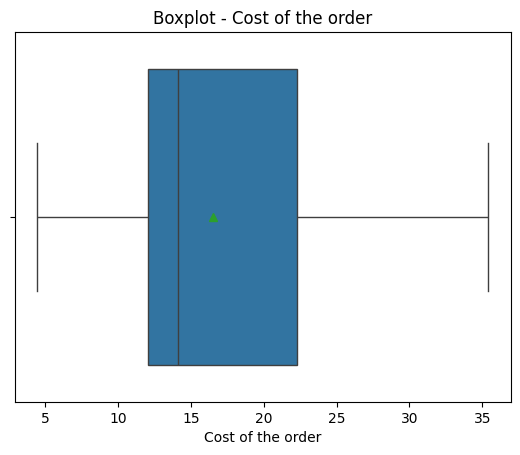

In [20]:

# Boxplot for Cost of the order

plt.title('Boxplot - Cost of the order')
sns.boxplot(data = fh, x = 'cost_of_the_order', showmeans=True).set(xlabel='Cost of the order');
plt.show();

In [24]:
fh_ur =fh.rating.unique()
fh_ur.sort()
print(fh_ur)

['3' '4' '5' 'Not given']


<Axes: ylabel='rating'>

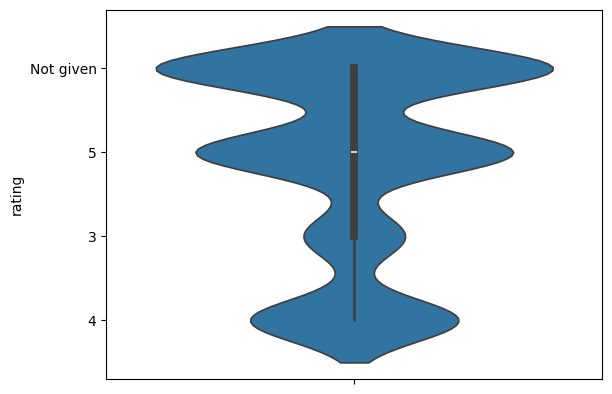

In [27]:
#sns.countplot(x="rating", data=fh, ax=axes[0]);

sns.violinplot(y="rating", data=fh)




<Axes: >

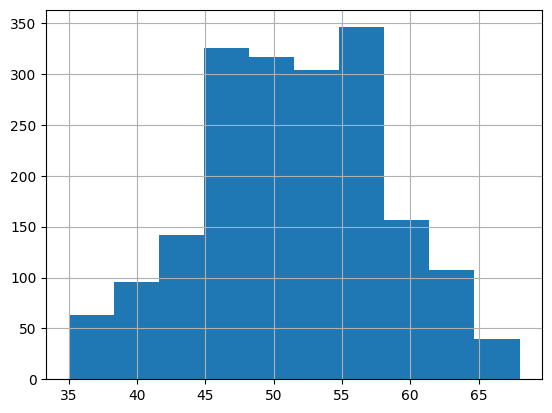

In [29]:
#total delivery time

fh.total_time_delivery.hist()

#most order taking 55 min

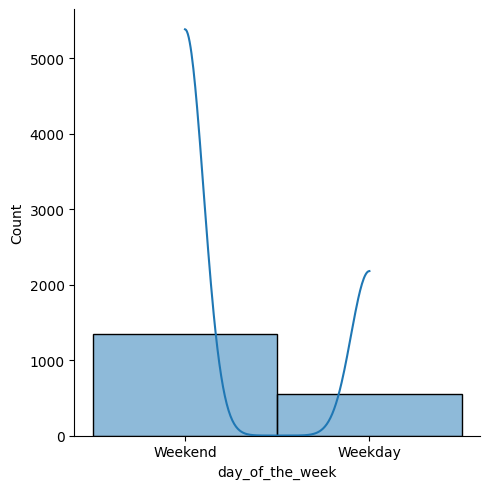

In [30]:
#Plot to analyze Day of the week data

sns.displot(data = fh, x = "day_of_the_week", bins = 10, kde = True)

#observation: Weekend has more order compared to Weekdays.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
# group by restaurant_name and count the number of orders
fh_grouped = fh.groupby("restaurant_name").size().reset_index(name="count")

# sort the grouped dataframe in descending order and select the top 5 rows
fh_top5 = fh_grouped.sort_values(by="count", ascending=False).head(5)

# print the result as a table
print(fh_top5)




               restaurant_name  count
136                Shake Shack    219
153          The Meatball Shop    132
21           Blue Ribbon Sushi    119
20   Blue Ribbon Fried Chicken     96
109                       Parm     68


#### Observations:Shark Shack with 219 orders has more number of order compared to any other restaurant.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [32]:
 # filter the dataframe by the day_of_the_week column and select only the rows where the value is Weekend
fh_weekend = fh[fh["day_of_the_week"] == "Weekend"]

# group the filtered dataframe by the cuisine_type column and count the number of orders
fh_weekend_grouped = fh_weekend.groupby("cuisine_type").size().reset_index(name="count")


 # sort the grouped dataframe in descending order and select the top row
fh_weekend_top = fh_weekend_grouped.sort_values(by="count", ascending=False).head(1)

# print the result as a table
print(fh_weekend_top)





  cuisine_type  count
0     American    415


#### Observations:
Most popular cuisine on weekends is American, with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [33]:
# filter the dataframe by the cost_of_order column and select only the rows where the value is greater than 20

fh_20 = fh[fh["cost_of_the_order"] > 20]
# count the number of rows in the filtered dataframe
fh_20_count = fh_20.shape[0]

 # divide the number of orders that cost more than 20 dollars by the total number of orders in the original dataframe
fh_20_prop = fh_20_count / fh.shape[0]


# multiply the result by 100 to get the percentage of the orders that cost more than 20 dollars
fh_20_perc = fh_20_prop * 100

# print the result as a percentage
print(f"{fh_20_perc:.2f}%")

29.24%


#### Observations:
About 29.24% of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [34]:
avg_time = fh['delivery_time'].mean()
avg_time

24.161749209694417

#### Observations:
It takes 24.16 minutes for an order to be delivered after it is placed.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [35]:
# group by customer_id and count the number of orders
fh_grouped = fh.groupby("customer_id").size().reset_index(name="count")
fh_grouped

# sort the grouped dataframe in descending order and select the top 3 rows
fh_top3 = fh_grouped.sort_values(by="count", ascending=False).head(3)

fh_top3





,customer_id,count
116,52832,13
84,47440,10
333,83287,9


#### Observations: 52832, 47440 and 83287 are top three frequent customers.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<ipython-input-36-7ae83d0afb86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fh_corr = fh.corr()


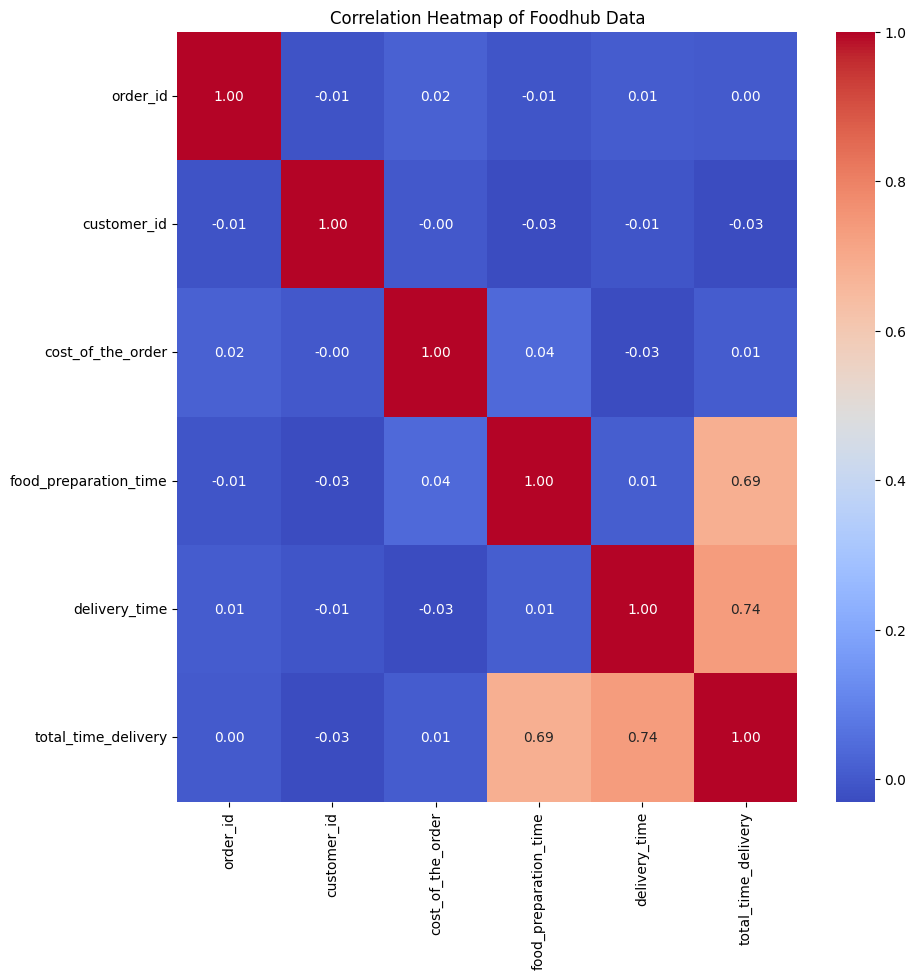

In [36]:
# calculate the correlation matrix of the dataframe
fh_corr = fh.corr()
# calculate the correlation matrix of the dataframe
fh_corr

# create a heat map from the correlation matrix
plt.figure(figsize=(10,10)) # adjust the size of the figure

# adjust the size of the figure
sns.heatmap(fh_corr, cmap="coolwarm", annot=True, fmt=".2f") # choose a color map, add annotations, and format the numbers
plt.title("Correlation Heatmap of Foodhub Data") # add a title for the heat map
plt.show() # show the heat map


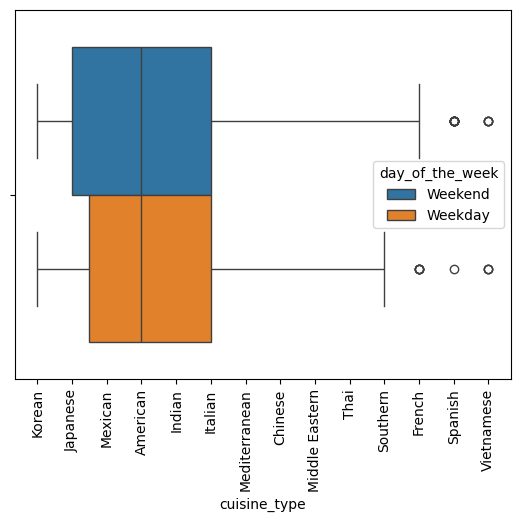

In [39]:
sns.boxplot(data=fh,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()


plt.show()

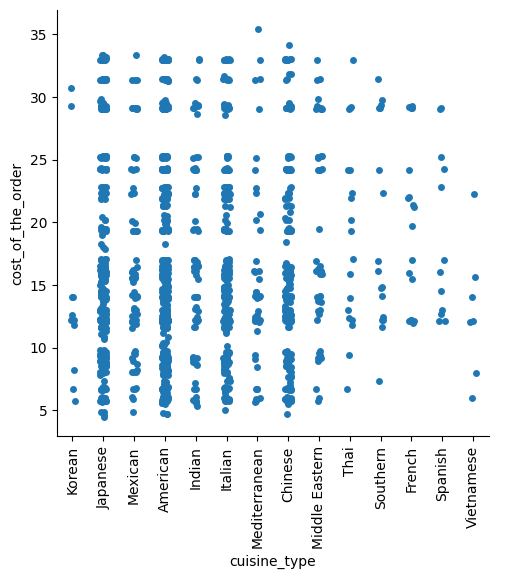

In [49]:
# char to analyze cusine and cost of the order
ctype_cst = sns.catplot(data=fh, x="cuisine_type", y="cost_of_the_order")
ctype_cst.tick_params(axis='x', rotation=90)

###observation: Japanese, American, Italian and Chinese has more number of order falls between 5 $ to 25 $

In [40]:
fh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   total_time_delivery    1898 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 148.4+ KB


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
#f_filtered = fh[(fh["rating_count"] > 50) & (fh["avg_rating"] > 4)]

fh_grouped = fh.groupby("customer_id").size().reset_index(name="count")
fh_grouped

,customer_id,count
0,1311,1
1,5139,1
2,5444,1
3,5693,1
4,6987,2
...,...,...
1195,402215,1
1196,403019,1
1197,403833,1
1198,404649,1


#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Multivariate analysis using scatter plot for numerical data and hue for categorical data
sns.scatterplot(x='price', y='quantity', hue='category', data=food_data)
plt.title('Multivariate Analysis: Price vs Quantity with Category')
plt.show()

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---